In [1]:
import sys
path = r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\venv\Utilities"
sys.path.append(path)

In [2]:
import numpy as np

In [3]:
data = np.genfromtxt(r"C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\Data\mu_z.txt", delimiter=" ")

In [4]:
z_sample = data.T[0]
mu_sample = data.T[1]
dmu = data.T[2]

In [5]:
from Utilities.OneDReg import LR
from Utilities import plot_settings

c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Utilities\OneDReg.py:157: SyntaxWarning: invalid escape sequence '\c'
  ax.text(0.05, 0.95, f'$\chi^2_r$ = {self.compute_reduced_chi2():.2f}',


In [13]:
fitter = LR(z_sample, mu_sample, dmu, 6, 0.15, 10) # YOU CANNOT CHANGE THIS

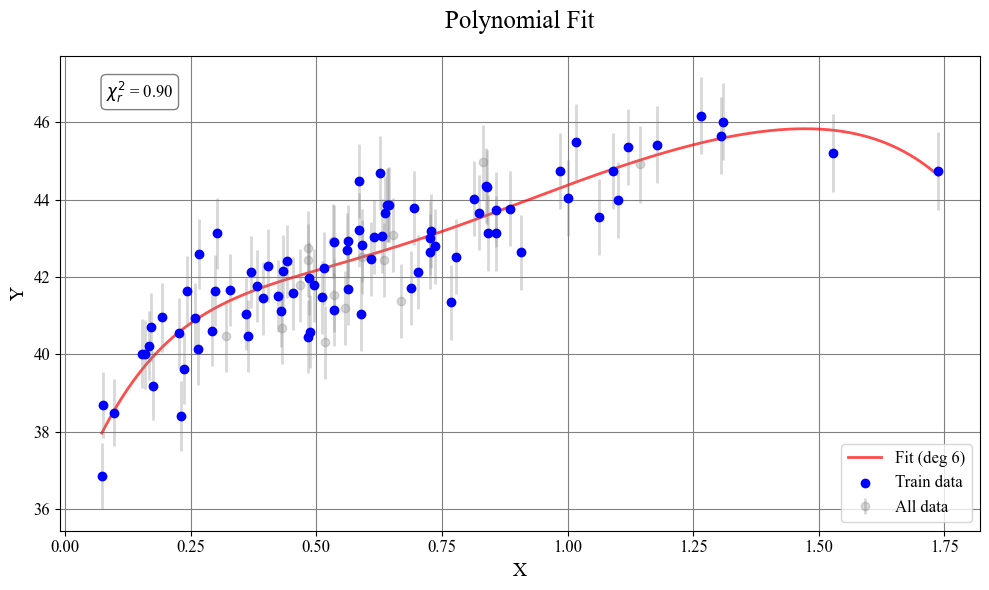

(array([  35.65304498,   38.0105473 ,  -99.55346552,  144.50007939,
        -110.62050978,   43.43994237,   -7.05802509]),
 array([[ 2.04181239e+00, -2.58314133e+01,  1.10664578e+02,
         -2.17388134e+02,  2.13686156e+02, -1.02010615e+02,
          1.87895254e+01],
        [-2.58314133e+01,  3.56630090e+02, -1.60804453e+03,
          3.26552741e+03, -3.28478804e+03,  1.59462994e+03,
         -2.97444329e+02],
        [ 1.10664578e+02, -1.60804453e+03,  7.52789279e+03,
         -1.57067859e+04,  1.61190860e+04, -7.94510667e+03,
          1.49956586e+03],
        [-2.17388134e+02,  3.26552741e+03, -1.57067859e+04,
          3.34656978e+04, -3.49097302e+04,  1.74305103e+04,
         -3.32389866e+03],
        [ 2.13686156e+02, -3.28478804e+03,  1.61190860e+04,
         -3.49097302e+04,  3.69042972e+04, -1.86283418e+04,
          3.58417779e+03],
        [-1.02010615e+02,  1.59462994e+03, -7.94510667e+03,
          1.74305103e+04, -1.86283418e+04,  9.48981132e+03,
         -1.83996225e+

In [14]:
fitter.train(True)

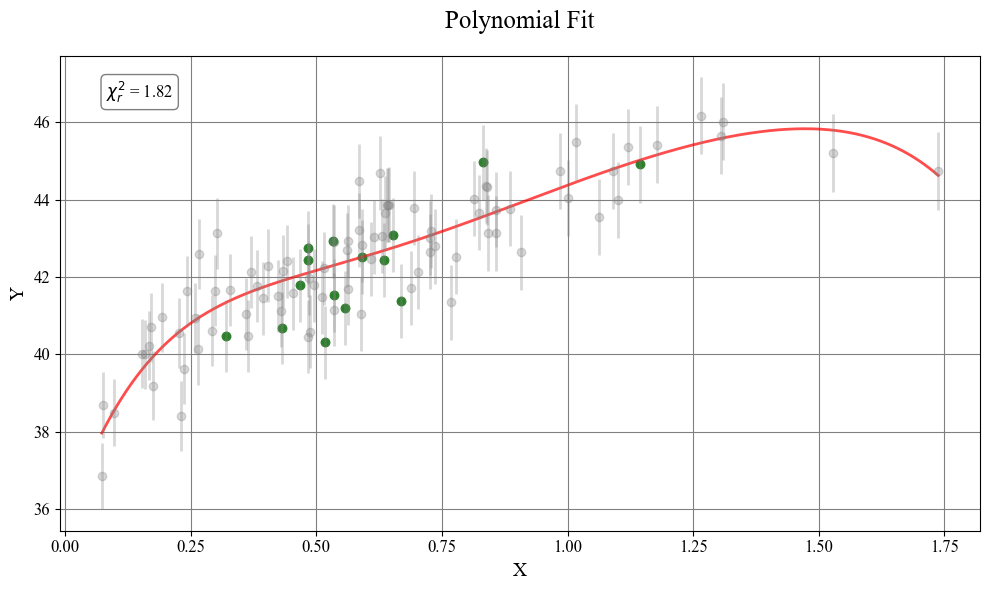

(array([  35.65304498,   38.0105473 ,  -99.55346552,  144.50007939,
        -110.62050978,   43.43994237,   -7.05802509]),
 array([[ 1.93012666e+06, -2.07622480e+07,  9.00056679e+07,
         -2.01445098e+08,  2.45521730e+08, -1.54422439e+08,
          3.91161968e+07],
        [-2.07622483e+07,  2.23444651e+08, -9.69108435e+08,
          2.16998853e+09, -2.64590285e+09,  1.66478540e+09,
         -4.21838739e+08],
        [ 9.00056708e+07, -9.69108451e+08,  4.20516689e+09,
         -9.42039526e+09,  1.14913762e+10, -7.23308836e+09,
          1.83340047e+09],
        [-2.01445108e+08,  2.16998860e+09, -9.42039541e+09,
          2.11129749e+10, -2.57652035e+10,  1.62236474e+10,
         -4.11362004e+09],
        [ 2.45521746e+08, -2.64590297e+09,  1.14913766e+10,
         -2.57652038e+10,  3.14548242e+10, -1.98132314e+10,
          5.02533082e+09],
        [-1.54422451e+08,  1.66478551e+09, -7.23308869e+09,
          1.62236479e+10, -1.98132317e+10,  1.24842382e+10,
         -3.16732564e+

In [15]:
fitter.test(True)

In [16]:
RMS = fitter.k_fold_cross_validation()

In [17]:
RMS

(np.float64(0.8588822731251605), np.float64(1.1929486298962975))

In [18]:
train, val = [], []
for i in range(16):
    mean_train, mean_val = fitter.k_fold_cross_validation()
    train.append(mean_train)    
    val.append(mean_val)

In [19]:
import matplotlib.pyplot as plt

In [20]:
degs = range(16)

Text(0.5, 1.0, 'Validation')

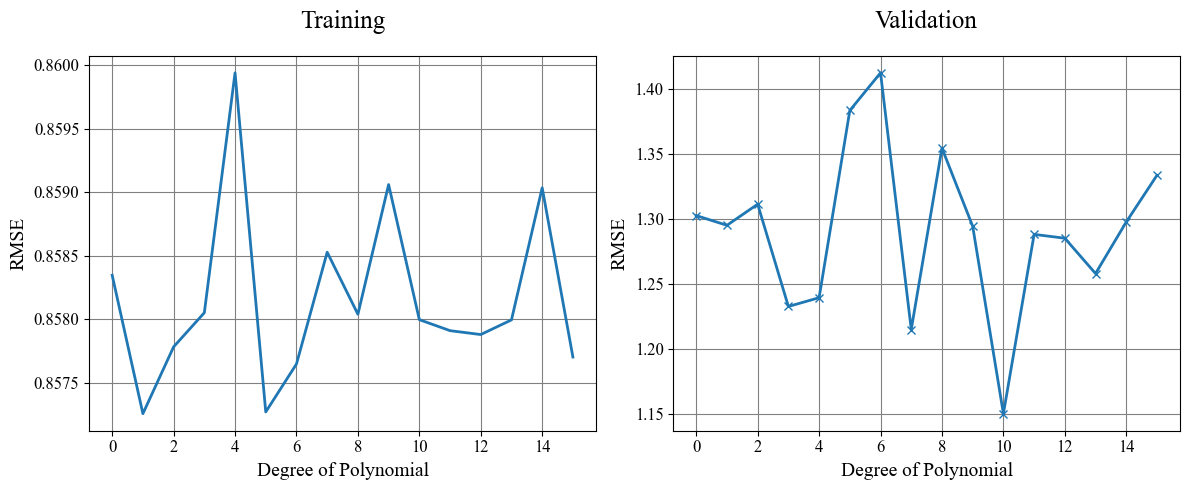

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
plt.subplot(121)
plt.plot(degs, train, label="Train")
plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE")
plt.title('Training')

plt.subplot(122)
plt.plot(degs, val, marker='x', label="Validation")
plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE")
plt.title('Validation')